end


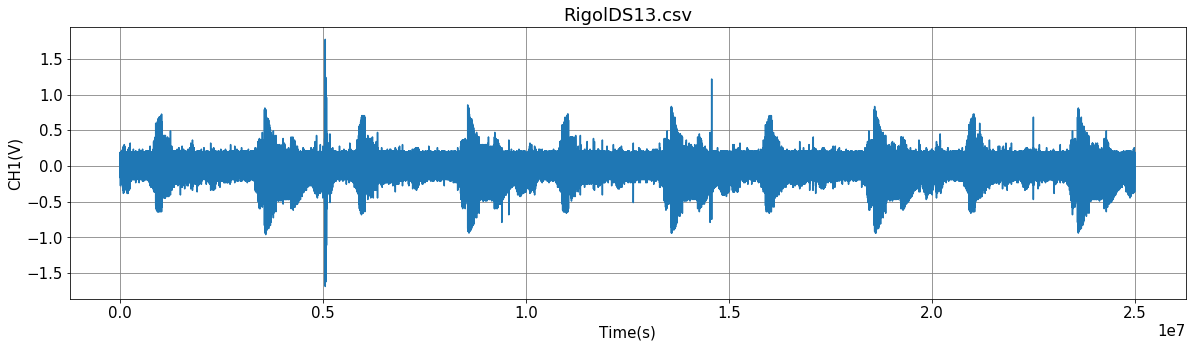

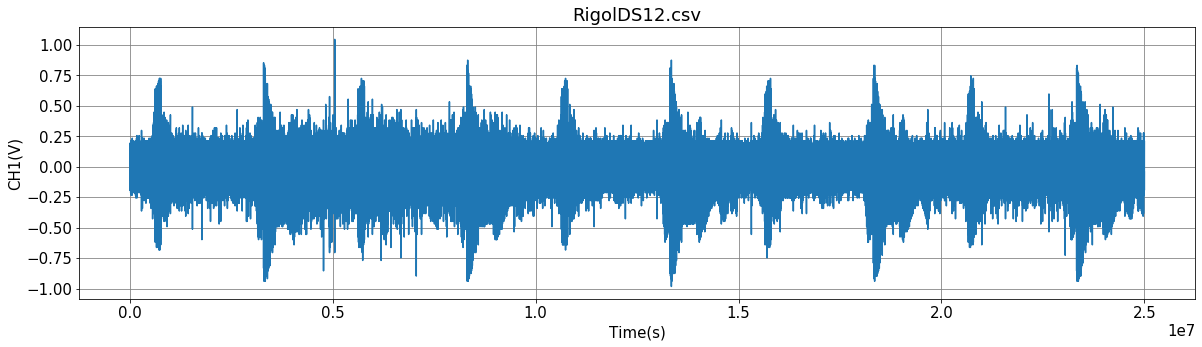

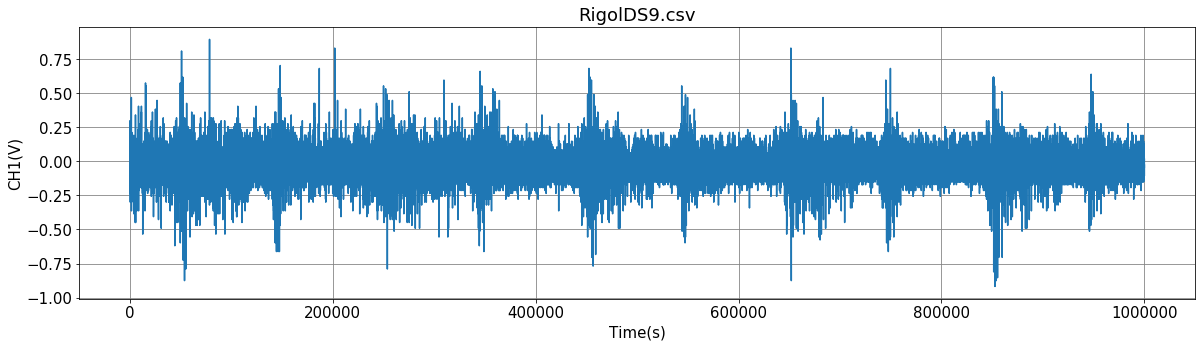

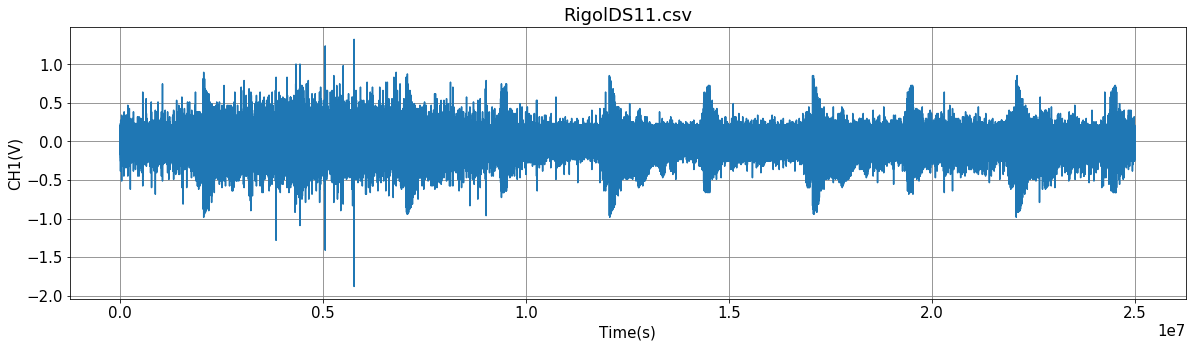

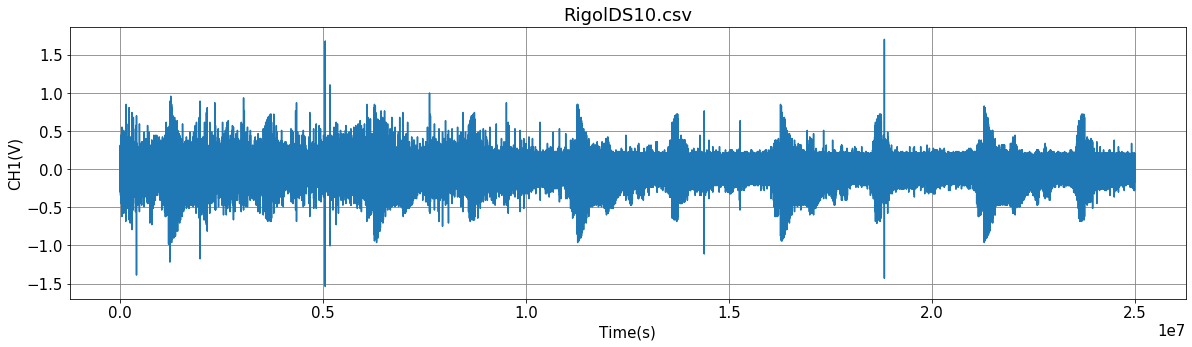

In [12]:
import glob
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

directory = "/storage/experiments/2021/0629_bourka_radosovice"

for f in glob.iglob(directory + "/slavia/*.csv"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]
        #print(st)
        
        df = pd.read_csv(f, sep=',', header=0)
        #print(df)
        plt.figure(figsize=(20,5))
        plt.tight_layout()
        matplotlib.rcParams.update({'font.size': 15})
        plt.plot(df.index,df['CH1(V)'])
        plt.title(st)
        plt.xlabel('Time(s)')
        plt.ylabel('CH1(V)')
        plt.grid(b=True, which='major', color='grey', linestyle='-')
    except:
        pass
        
print('end')

# ThunderMill

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 

directory = "/storage/experiments/2021/0807_bourka_sobeslav"
directory = "/storage/experiments/2022/0120_vanice"
directory = "/storage/experiments/2022/0819_bourka_strancice_CAR1"
directory = "/storage/experiments/2022/0819_bourka_strancice_CAR1/mox/efm/"
directory = "/storage/experiments/2022/0826_bourka_staryvestec_CAR1/mox/efm/"

f = directory + 'CAREFM_CARx_20220819_190559.log'
f = directory + 'CAREFM_CARx_20220826_143226.log'
f = directory + 'CAREFM_CARx_20220826_184956.log'

f = '/storage/experiments/2022/0827_bourka_morava_CAR1/mox/efm/CAREFM_CARx_20220827_165151.log'
#f = '/storage/experiments/2022/0827_bourka_morava_CAR1/mox/efm/CAREFM_CARx_20220827_223657.log'
f = '/storage/experiments/2022/0827_bourka_morava_CAR1/mox/efm/CAREFM_CARx_20220827_183301.log'

In [33]:
l=[]
l.extend(range(0,2))
df = pd.read_table(f, sep=',', header=None, names=l, comment='*',engine='python' )


In [34]:
df['UTC']=pd.to_datetime(df[0].astype(str), format='%Y%m%d_%H%M%S.%f')
df.set_index('UTC', inplace=True, drop=False)


(-20.0, 20.0)

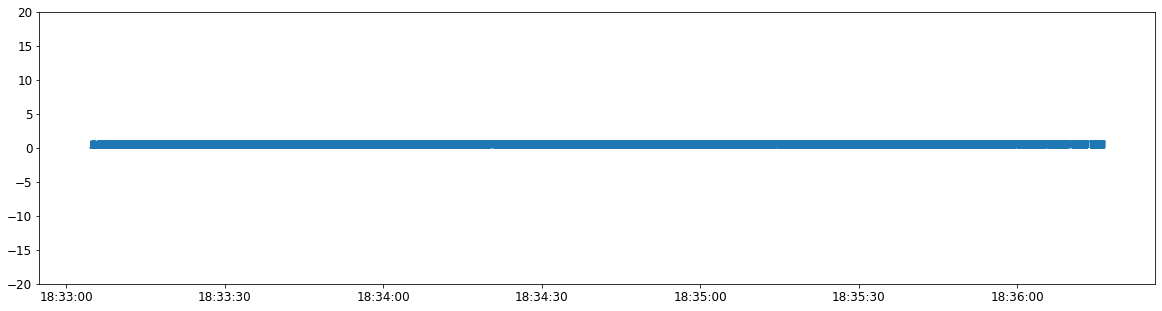

In [35]:
plt.figure(figsize=(20,5))
plt.rc('font', size=12)    

#plt.plot(df[1].loc['2022-08-19 19:10':'2022-08-19 20:29']-128)
#plt.plot(df[1].loc['2022-08-19 19:10':'2022-08-19 19:40']-128)
#plt.plot(df[1].loc['2022-08-26 15:00:00':'2022-08-26 17:00']-128)
plt.plot(df[1]-128)
plt.ylim(-20,20)

In [10]:
#xx = df
xx = pd.concat([xx,df])

In [11]:
dir = '/storage/experiments/2022/0826_bourka_staryvestec_CAR1/parallella/'

yy = pd.DataFrame()

for f in glob.iglob(dir + "rec*"): 
    s = f.split('/')
    st = s[len(s)-1]
    time = st.split('_')
    if (time[1][-1]=='g'):
        continue
    #print(time[1])
    zz = pd.DataFrame([time[1]])
    yy = pd.concat([yy, zz])

yy['UTC']=pd.to_datetime(yy[0].astype(str), format='%y%m%d-%H%M%S.%f')
yy.set_index('UTC', inplace=True, drop=False)
yy.sort_index(inplace=True)
yy[1] = 10


In [106]:
yy

,0,UTC,1
UTC,,,
2022-08-26 15:25:05.330,220826-152505.33,2022-08-26 15:25:05.330,10
2022-08-26 16:03:57.860,220826-160357.86,2022-08-26 16:03:57.860,10
2022-08-26 16:05:24.750,220826-160524.75,2022-08-26 16:05:24.750,10
2022-08-26 16:06:18.900,220826-160618.90,2022-08-26 16:06:18.900,10
2022-08-26 16:07:22.230,220826-160722.23,2022-08-26 16:07:22.230,10
...,...,...,...
2022-08-26 17:53:00.180,220826-175300.18,2022-08-26 17:53:00.180,10
2022-08-26 17:53:28.780,220826-175328.78,2022-08-26 17:53:28.780,10
2022-08-26 17:53:58.250,220826-175358.25,2022-08-26 17:53:58.250,10


# EFM kleinwachter

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 

directory = "/storage/experiments/2021/0807_bourka_sobeslav"
directory = "/storage/experiments/2022/0120_vanice"
directory = "/storage/experiments/2022/0819_bourka_strancice_CAR1"
directory = "/storage/experiments/2022/0826_bourka_staryvestec_CAR1"

f = directory + '/efm/DATALOG.TXT'


In [13]:
l=[]
l.extend(range(0,20))
df = pd.read_table(f, sep=',', header=None, names=l, comment='*',engine='python' )


In [14]:
df['seconds'] = df.loc[df[0] == '$TIME',1]
df['measurement'] = df.index
df['seconds'] = pd.to_numeric(df['seconds'])
df['offset'] = df.loc[df[0] == '$TIME','measurement']
df['seconds'] = df['seconds'].fillna(method='ffill')
df['offset'] = df['offset'].fillna(method='ffill')
df['milliseconds'] = (df['measurement'] - df['offset']) * 0.089 + df['seconds']


In [15]:
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

if (len(df.loc[df[0]=='$GNRMC']) > 0):
    print('Warning - Multiconstellation appears')
    print('Use next cell.')
    raise StopExecution
#df.drop(df.loc[(df[0]=='$GPRMC') & (df[2]=='V')].index, inplace=True)
df['latf'] = pd.to_numeric(df.loc[df[0]=='$GPRMC',3])
df['lonf'] = pd.to_numeric(df.loc[df[0]=='$GPRMC',5])
df['on_milliseconds'] = df['seconds'] * 1000
df['milliseconds'] = df['milliseconds'] * 1000
df['gps_time'] = df.loc[df[0]=='$GPRMC',1]
df['gps_date'] = df.loc[df[0]=='$GPRMC',9]
df['alt'] = df.loc[df[0]=='$GPGGA',9]
df.loc[(df[0]=='$GPRMC') & (df[6]=='E'),'lon_hem']=1
df.loc[(df[0]=='$GPRMC') & (df[6]=='W'),'lon_hem']=-1
df.loc[(df[0]=='$GPRMC') & (df[4]=='N'),'lat_hem']=1
df.loc[(df[0]=='$GPRMC') & (df[4]=='S'),'lat_hem']=-1
df['lat'] = (np.trunc(df['latf']/100) + (((df['latf']/100) - np.trunc(df['latf']/100)) * 100) / 60.0) * df['lat_hem']
df['lon'] = (np.trunc(df['lonf']/100) + ((df['lonf']/100) - np.trunc(df['lonf']/100)) * 100 / 60.0) * df['lon_hem']  
df['date'] = pd.to_datetime(df['gps_date']+df['gps_time'], format='%d%m%y%H%M%S.%f')#,errors='coerce')
df.drop('lon_hem', axis=1, inplace=True)
df.drop('lat_hem', axis=1, inplace=True)
df.drop('latf', axis=1, inplace=True)
df.drop('lonf', axis=1, inplace=True)
df.drop('gps_time', axis=1, inplace=True)
df.drop('gps_date', axis=1, inplace=True)
df['meas'] = df.loc[df[0]=='$HIST',1]
df = df.fillna(method='ffill')
df.drop(df[df[0]=='$GPGGA'].index, inplace=True)
df.drop(df[df[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$AIRDOS'].index, inplace=True)
df.drop(df[df[0]=='$TIME'].index, inplace=True)
df.drop(df[df[0]=='$MLYNEK'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df['UTC'] = df['date'] + pd.to_timedelta(df['milliseconds'], unit='ms') - pd.to_timedelta(df['on_milliseconds'], unit='ms')
df.drop('date', axis=1, inplace=True)
df.drop('milliseconds', axis=1, inplace=True)
df.drop('on_milliseconds', axis=1, inplace=True)
df


,0,1,2,3,4,5,6,7,8,9,...,18,19,seconds,measurement,offset,alt,lat,lon,meas,UTC
2,-127,0,None,None,None,None,None,None,None,None,...,NaN,NaN,0.0,2,1.0,NaN,NaN,NaN,NaN,NaT
3,0,0,None,None,None,None,None,None,None,None,...,NaN,NaN,0.0,3,1.0,NaN,NaN,NaN,NaN,NaT
4,0,0,None,None,None,None,None,None,None,None,...,NaN,NaN,0.0,4,1.0,NaN,NaN,NaN,NaN,NaT
5,0,0,None,None,None,None,None,None,None,None,...,NaN,NaN,0.0,5,1.0,NaN,NaN,NaN,NaN,NaT
6,0,0,None,None,None,None,None,None,None,None,...,NaN,NaN,0.0,6,1.0,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109388,0,9844,T,5009.10786,M,0.016,N,0.030,K,A,...,171.0,34.0,9844.0,109388,108392.0,188.8,50.151798,14.86233,NaN,2022-08-26 18:13:19.644
109389,0,9844,T,5009.10786,M,0.016,N,0.030,K,A,...,171.0,34.0,9844.0,109389,108392.0,188.8,50.151798,14.86233,NaN,2022-08-26 18:13:19.733
109390,0,9844,T,5009.10786,M,0.016,N,0.030,K,A,...,171.0,34.0,9844.0,109390,108392.0,188.8,50.151798,14.86233,NaN,2022-08-26 18:13:19.822
109391,0,9844,T,5009.10786,M,0.016,N,0.030,K,A,...,171.0,34.0,9844.0,109391,108392.0,188.8,50.151798,14.86233,NaN,2022-08-26 18:13:19.911


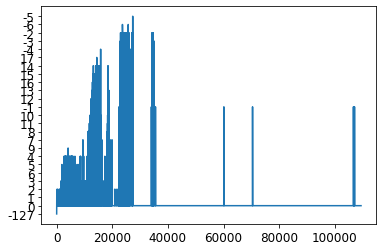

In [132]:
#df.iloc[:5000].loc[df[0] == '$TIME']
plt.plot(df[0])

/tmp/ipykernel_24577/303539927.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  plt.plot(df[0].loc['2022-08-26 15:00:00':'2022-08-26 17:00'])


(-10.0, 20.0)

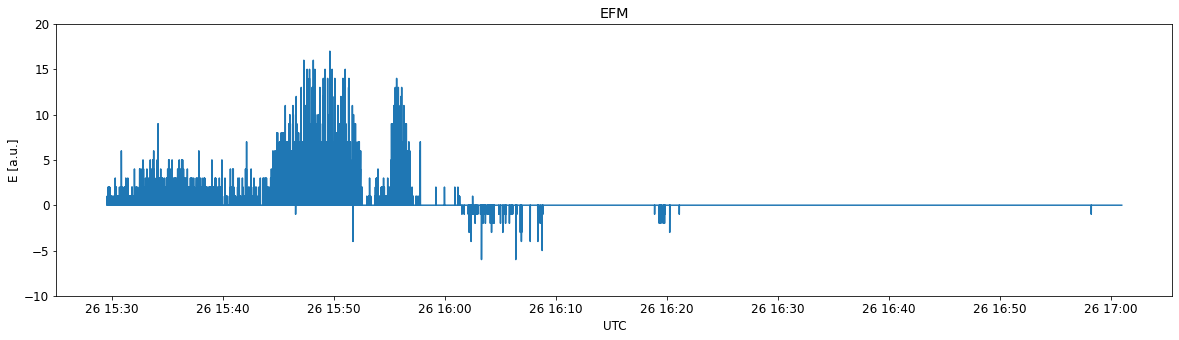

In [133]:
df.set_index('UTC', inplace=True, drop=False)
df.sort_index(inplace=True)
df[0] = pd.to_numeric(df[0])

plt.figure(figsize=(20,5))
plt.rc('font', size=12)    

#plt.plot(df[0].loc['2022-08-19 19:12':'2022-08-19 19:22'])
plt.plot(df[0].loc['2022-08-26 15:00:00':'2022-08-26 17:00'])
#plt.plot(df[0])
plt.title('EFM')
plt.xlabel('UTC')
plt.ylabel('E [a.u.]')
plt.ylim(-10,20)


/tmp/ipykernel_30328/3661956993.py:10: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  plt.plot(df[0].loc['2022-08-26 16:00:00':'2022-08-26 17:40'], label='kleinwachter', alpha=0.5)
/tmp/ipykernel_30328/3661956993.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  plt.plot(xx[1].loc['2022-08-26 16:00:00':'2022-08-26 17:40']-128, label='thundermill', alpha=0.5)


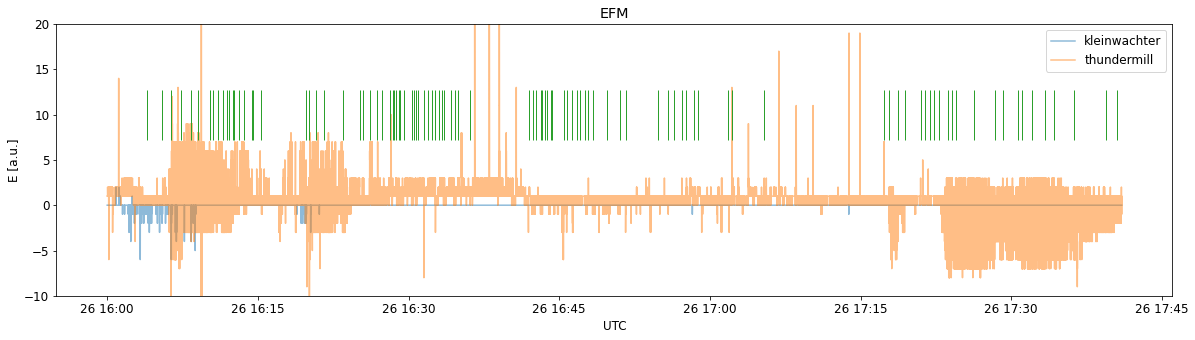

In [18]:
df.set_index('UTC', inplace=True, drop=False)
df.sort_index(inplace=True)
df[0] = pd.to_numeric(df[0])

plt.figure(figsize=(20,5))
plt.rc('font', size=12)    

#plt.plot(df[0].loc['2022-08-26 15:20:00':'2022-08-26 18:30'], label='kleinwachter', alpha=0.5)
#plt.plot(xx[1].loc['2022-08-26 15:20:00':'2022-08-26 18:30']-128, label='thundermill', alpha=0.5)
plt.plot(df[0].loc['2022-08-26 16:00:00':'2022-08-26 17:40'], label='kleinwachter', alpha=0.5)
plt.plot(xx[1].loc['2022-08-26 16:00:00':'2022-08-26 17:40']-128, label='thundermill', alpha=0.5)
plt.plot(yy[1].loc['2022-08-26 16:00:00':'2022-08-26 17:40'], linestyle='', marker='|', markersize=50)
#plt.plot(df[1]-128)
plt.ylim(-20,20)
#plt.plot(df[0])
plt.title('EFM')
plt.xlabel('UTC')
plt.ylabel('E [a.u.]')
plt.ylim(-10,20)
plt.legend()


Text(0.5, 0, 'UTC')

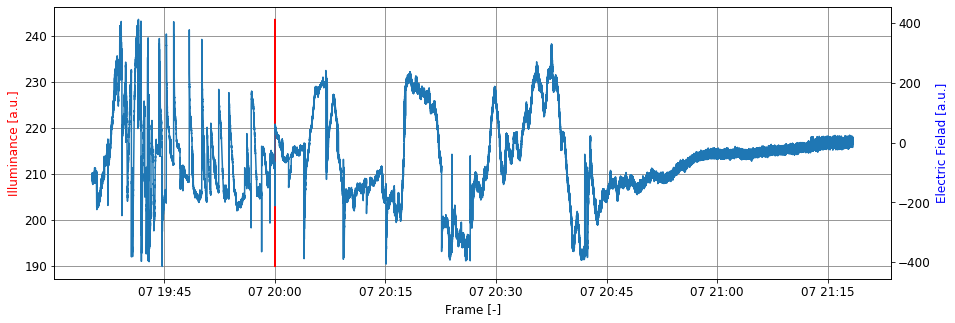

In [92]:
snap_time = 620 # us

yy = y

t0 = pd.to_datetime(time0)
time1st = t0  - pd.to_timedelta(1000, unit='ms')
yy['time'] = time1st + pd.to_timedelta(y.index * snap_time, unit='us') + pd.to_timedelta(timediff, unit='ms') 

xx = df.loc['2021-08-07 19:59:55':'2021-08-07 20:00:5']
xx = df

yy.set_index('time', inplace=True, drop=False)
yy.sort_index(inplace=True)

plt.figure(figsize=(15,5))
plt.rc('font', size=12)    

plt.plot(y['0'], color='red')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.xlabel('Frame [-]')
plt.ylabel('Illuminance [a.u.]', color='red')

plt.twinx()

plt.plot(xx[0])
plt.ylabel('Electric Fielad [a.u.]', color='blue')
plt.xlabel('UTC')


